<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Analyzing_MOF_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

1. Loading JARVIS-DFT 3D and 2D json from figshare 
2. Making pandas dataframe,
3. Properties available, keys
4. Histogram of properties
5. Compare bandgaps from different DFT methods, OptB88vdW, TBmBJ
6. Multi-property filter for 3D material-screenig example
7. Example: find all cubic materials
8. Exfoliation energy distribution for 2D materials
9. Multi-property filter for 2D dataset

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 944 kB 4.9 MB/s 
     |████████████████████████████████| 296 kB 11.0 MB/s 


### We have prepared a basic json file with meta-data associated with JARVIS-DFT. So, first let's import jarvis-dft metadata from the figshre repository. This has been built as a module in the jarvis-tools


In [2]:
# !pip install jarvis-tools, and restart runtime in the notebook if you haven't installed it yet
from jarvis.db.figshare import data

qmof = data('qmof')


Obtaining QMOF dataset 18k...
Reference:https://www.cell.com/matter/fulltext/S2590-2385(21)00070-9


100%|██████████| 55.0M/55.0M [00:03<00:00, 16.2MiB/s]


Loading the zipfile...
Loading completed.


In [4]:
# data-size
print (len(qmof))

18321


In [5]:
# let's make a pandas dataframe from the figshare json file
# pip install pandas, if you haven't installed yet
import pandas as pd
import numpy as np

df=pd.DataFrame(qmof)

In [6]:
# Keys in the json file
print (df.columns, len(df.columns))

Index(['id', 'formula', 'atoms', 'energy_total', 'bandgap', 'net_magmom'], dtype='object') 6


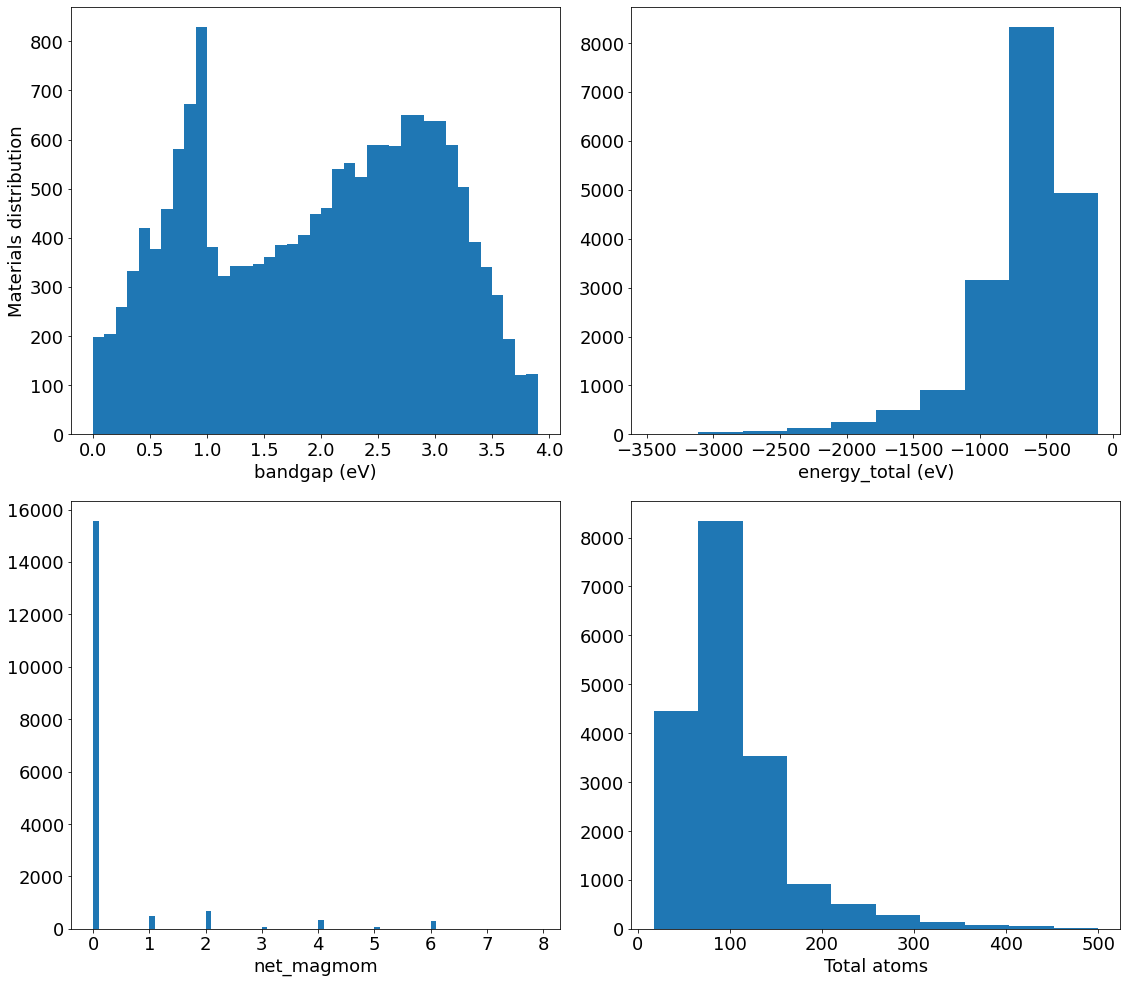

In [12]:
# Now let's make a histogram for some of the material-properties in the dataset
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from jarvis.core.atoms import Atoms

the_grid = GridSpec(2, 2)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,14))

plt.subplot(the_grid[0,0])
val=np.array(df['bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4,.1))
plt.xlabel('bandgap (eV)')
plt.ylabel('Materials distribution')

plt.subplot(the_grid[0,1])
val=np.array(df['energy_total'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('energy_total (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1,0])
val=np.array(df['net_magmom'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('net_magmom')
#plt.ylabel('Materials distribution')

df['natoms'] = df['atoms'].apply(lambda x: Atoms.from_dict(x).num_atoms)
plt.subplot(the_grid[1,1])
val=np.array(df['natoms'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val)#,bins=np.arange(0,8,.1))
plt.xlabel('# atoms')

plt.tight_layout()

Mats. with both OptB88vdW bandgaps 36099
Mats. with both TBmBJ abd OptB88vdW bandgaps 9947


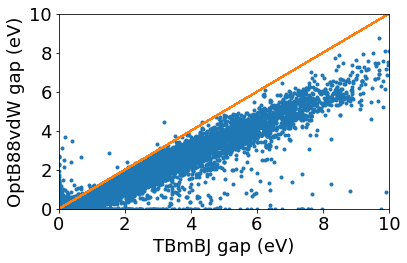

In [ ]:
# Let's compare OptB88vdW and TBmBJ bandgaps
df2=df[['optb88vdw_bandgap','mbj_bandgap']].replace('na',np.nan).dropna()
plt.plot(df2['mbj_bandgap'], df2['optb88vdw_bandgap'],'.')
plt.plot(df2['mbj_bandgap'], df2['mbj_bandgap'])
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('TBmBJ gap (eV)')
plt.ylabel('OptB88vdW gap (eV)')
plt.tight_layout()
print ('Mats. with both OptB88vdW bandgaps', len(df['optb88vdw_bandgap']))
print ('Mats. with both TBmBJ abd OptB88vdW bandgaps', len(df2['mbj_bandgap']))

### Material-screening example: Let's find materials which has Bi element, has spin-orbit spillage >= 0.5, have OptB88vdW bandgaps > 0.1, energy above convex hull < 0.1 eV/atom , have SLME >5 %

In [ ]:
df3 = df[['optb88vdw_bandgap','spillage', 'ehull', 'slme', 'atoms', 'jid']].replace('na',np.nan).dropna()

In [ ]:
from jarvis.core.atoms import Atoms
def has_element(atoms_dict = {}, my_element = 'Bi'):
    atoms = Atoms.from_dict(atoms_dict)
    elements = atoms.elements
    if my_element in elements:
        return True
    else:
        return np.nan
    
df3['el'] = df3['atoms'].apply(lambda x: has_element(atoms_dict = x, my_element = 'Bi'))
df3['formula'] = df3['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [ ]:
df4 = df3.dropna()

In [ ]:
df4[(df4['optb88vdw_bandgap'] >= .1) & (df4['spillage'] >=.5 ) & (df4['ehull'] <=.1 ) & (df4['slme'] >=5 )  ]

,optb88vdw_bandgap,spillage,ehull,slme,atoms,jid,el,formula
180,0.9855,0.755,0.025189,32.282755,"{'lattice_mat': [[4.1670203186750125, 0.0, 0.0...",JVASP-5215,True,Bi2Se3
257,0.5569,1.275,0.012965,31.805149,"{'lattice_mat': [[4.425877989755294, 0.0, 0.0]...",JVASP-5374,True,IBi
752,0.3072,4.032,0.000000,29.685680,"{'lattice_mat': [[5.222331821181116, -0.0, 0.0...",JVASP-22653,True,Sr3BiN
758,0.5344,2.677,0.000000,33.434736,"{'lattice_mat': [[4.172273561810926, -1.864909...",JVASP-22657,True,LiMgBi
862,0.5039,1.639,0.000000,20.337451,"{'lattice_mat': [[0.0, 3.485394766378691, 3.48...",JVASP-22724,True,NaLi2Bi
2020,0.8202,0.682,0.011756,29.993716,"{'lattice_mat': [[4.420421720230594, 0.0, 0.0]...",JVASP-32749,True,BiI
2026,0.7193,1.179,0.012828,29.839427,"{'lattice_mat': [[4.260514703242369, 1.1598804...",JVASP-32759,True,BiBr
2100,0.4932,0.839,0.000000,31.705820,"{'lattice_mat': [[4.26929704078232, -2e-16, 0....",JVASP-29647,True,Bi2Pb2Se5
3367,0.2744,1.271,0.000000,27.298235,"{'lattice_mat': [[5.395927183581751, 0.0, -0.0...",JVASP-36474,True,Ca3BiP
3846,0.5555,2.094,0.000000,33.774224,"{'lattice_mat': [[4.899594431025933, 0.0, 0.0]...",JVASP-35067,True,KMgBi


### Find all cubic materials

In [ ]:
from jarvis.analysis.structure.spacegroup import Spacegroup3D
# Takes some time because we are running spacegroup analysis on all the materials
def crystal_system(atoms_dict={}):
    atoms = Atoms.from_dict(atoms_dict)
    system = Spacegroup3D(Atoms.from_dict(atoms_dict)).crystal_system
    return system
df['crystal_system'] = df['atoms'].apply(lambda x: crystal_system(atoms_dict = x))

In [ ]:
len(df[df['crystal_system']=='cubic'])

10725

In [ ]:
# We can store the screened materials in a new json file
# Note that the primitive cell can have non-equal lattice-constants but not the conventional cell
from jarvis.db.jsonutils import dumpjson
dumpjson(data = df[df['crystal_system']=='cubic']['atoms'].values.tolist(), filename='all_cubic.json')

### Working with 2D dataset

In [ ]:
df_2d=pd.DataFrame(dft_2d)

In [ ]:
df_2d.columns

Index(['formation_energy_peratom', 'optb88vdw_bandgap', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'encut',
       'optb88vdw_total_energy', 'mbj_bandgap', 'epsx', 'mepsx', 'epsy',
       'mepsy', 'epsz', 'mepsz', 'atoms', 'kpoints_array', 'jid',
       'bulk_modulus_kv', 'shear_modulus_gv', 'exfoliation_energy', 'modes',
       'magmom_outcar', 'magmom_oszicar', 'icsd'],
      dtype='object')

Text(0.5, 0, 'Exfoliation energy (eV)')

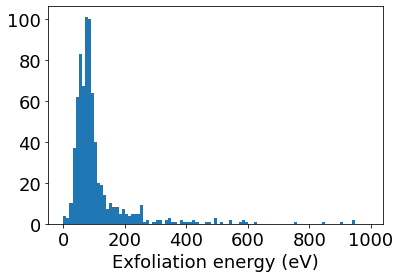

In [ ]:
val=np.array(df_2d['exfoliation_energy'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,1000,10))
#plt.ylabel('Materials distribution')
plt.xlabel('Exfoliation energy (eV)')

In [ ]:
#Let's find exfoliable 2D materials with magnetic moment>0.5 muB , optb88vdw_bandgap > 0.05 and exfoliation_energy < 200

In [ ]:
df_2d_a = df_2d[['atoms', 'optb88vdw_bandgap','exfoliation_energy', 'magmom_oszicar','jid']].replace('na',np.nan).dropna()

In [ ]:
df_2d_a['formula'] = df_2d_a['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [ ]:
df_2d_a[(df_2d_a['optb88vdw_bandgap'] >= .05) & (df_2d_a['exfoliation_energy'] <200 ) & (df_2d_a['magmom_oszicar'] >=.5  )  ]

,atoms,optb88vdw_bandgap,exfoliation_energy,magmom_oszicar,jid,formula
85,"{'lattice_mat': [[3.626624525225858, 0.0, 0.0]...",0.7098,71.726433,3.0010,JVASP-8879,VCl2
114,"{'lattice_mat': [[5.791947881162556, 4.7246239...",1.0017,72.344250,2.0016,JVASP-6742,FeCl3
118,"{'lattice_mat': [[3.49758854204341, -1e-16, 0....",0.0673,67.410900,4.0006,JVASP-6055,FeCl2
120,"{'lattice_mat': [[3.470086624548717, 0.0, 0.0]...",0.3612,67.445633,2.9996,JVASP-8915,CoCl2
127,"{'lattice_mat': [[6.072311052981682, 0.0, 0.0]...",0.2715,95.031000,3.9994,JVASP-6109,MoBr3
...,...,...,...,...,...,...
1031,"{'lattice_mat': [[5.80171623284078, -0.0037258...",1.1207,43.259556,1.9989,JVASP-75284,FeP2S6
1040,"{'lattice_mat': [[3.1825586772463623, 0.0, 0.0...",0.0857,98.102800,5.9994,JVASP-75319,LiVF3
1041,"{'lattice_mat': [[5.825064631761128, 1.9232331...",0.9141,57.939583,0.9380,JVASP-75320,Co3TeO8
1043,"{'lattice_mat': [[3.2651579585109913, -8.59494...",0.0729,54.869667,3.9999,JVASP-75331,VOF
